### <p style="text-align:left"><span style="color:green">Importing Required `Libraries`</span></p>

In [1]:
# Data manipulation and analysis libraries:
import numpy as np
import pandas as pd

# Data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Other libraries:
#from tqdm import tqdm
import warnings
import os

# Data science imports:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
)
from sklearn.model_selection import KFold
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    median_absolute_error
)

# Configure pandas to display all columns:
pd.set_option('display.max_columns', None)

# Render figures directly in the notebook:
%matplotlib inline

# Render higher resolution images:
%config InlineBackend.figure_format = 'retina'

# Ignore warning messages:
warnings.filterwarnings('ignore')

### <p style="text-align:left"><span style="color:green">Reading the `CSV File`</span></p>

In [2]:
tweets_df = pd.read_csv('../data/tweets dataset.csv', encoding = "ISO-8859-1")

In [3]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
tweets_df.shape

(9093, 3)

The dataset contains 9093 records and consists in three columns:

* **tweet_text :** The tweet's content
* **emotion_in_tweet_is_directed_at :** The brand mentioned in the tweet
* **is_there_an_emotion_directed_at_a_brand_or_product :** The emotion/neutrality expressed in the tweet   


### <p style="text-align:left"><span style="color:green">Exploring the dataset</span></p>

Let us first check wether our data is cleaned and if there is any missing values

In [5]:
print("The data columns contain the following missing values: ")
tweets_df.isna().sum()

The data columns contain the following missing values: 


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

As we can see, there is a missing tweet, we will delete it later since it is not relevant in our case. 
There are also 5802 missing values out of 9093 in the *emotion_in_tweet_is_directed_at* column, we will implement an approach to deal with them later since they represent an important percentage of our data which could bring us significant insights and help us in the analysis and visualization part

In order to analyze the tweet's structure and find more about its relationship with the column *emotion_in_tweet_is_directed_at*, we can display fully  some samples :

In [6]:
random_df  =  tweets_df.sample(n = 200)
for i in range(len(random_df)):
    print(random_df.iloc[i][0])
    print(random_df.iloc[i][1])
    print('----------')


Tablets like the iPad and Xoom where touch emulates a mouse-click/keyboard input means we're not there yet. #sxsw #gswsxsw #futureoftouch
iPad
----------
at the Android party and kinda embarrassed by my iPhone #SXSW
iPhone
----------
I woke up before my iPhone finished recharging. That means I got enough sleep last night, right? #sxsw
nan
----------
@mention what size did you get? Did you got the apple pop store they opened up at #sxsw
nan
----------
RT @mention RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw #sxswi
nan
----------
Circles will be circus RT @mention Google Circles will be ______    #sxsw
nan
----------
&quot;papyrus...sort of like the ipad&quot; - nice! Lol! #SXSW Lavelle
iPad
----------
&quot;iPad Design Headaches (2 Tablets, Call in the Morning)&quot; at #SXSW is packed!
nan
----------
#sxsw hotspots by Klout score? Score! Cluster, a @mention @mention  mashup from @mention and @mention {link}
nan
----------
@mention I 

By observing and analyzing the above result , we can make some preliminary hypotheses: 
* The tweets don't follow a standard structure, they start sometimes with a mention, other times with an hashtag , and even with simple words directly.
* The brands mentioned in the tweets aren't always simly identifiable,m especially when they are not preceded with an hashtag or a mention, which would make the task of replacing the missing value of the brands comumn harder .
* The tweets contain some insignificant words/ characters, which are not useful and will be deleted

Let's take a look at our target column which is *is_there_an_emotion_directed_at_a_brand_or_product*, and explore the different classes:

In [7]:
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

It seems that we have 4 classes that rate the emotion expressed in the tweets. howevwr this classes are not well balances, especially the "I can't tell" one : there are so few of these values in comparison with the rest of the classes, and since it won't be so useful for our purpose, we will delete it later.

### <p style="text-align:left"><span style="color:green">Cleaning and preprocessing</span></p>

In [8]:
tweets_df.rename(columns={'tweet_text': 'tweets', 'emotion_in_tweet_is_directed_at': 'brands', 'is_there_an_emotion_directed_at_a_brand_or_product': 'emotions'}, inplace=True)

In [9]:
drop_indexes = tweets_df[(tweets_df['emotions'] == "I can't tell")].index
tweets_df.drop(drop_indexes, inplace = True)
tweets_df.dropna(subset = ['tweets'], inplace=True)

In [10]:
tweets_df.isna().sum()

tweets         0
brands      5654
emotions       0
dtype: int64

In [11]:
tweets_df['emotions'].value_counts()

emotions
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: count, dtype: int64

In [12]:
tweets_df['emotions'].value_counts(normalize = True)

emotions
No emotion toward brand or product    0.602954
Positive emotion                      0.333259
Negative emotion                      0.063787
Name: proportion, dtype: float64

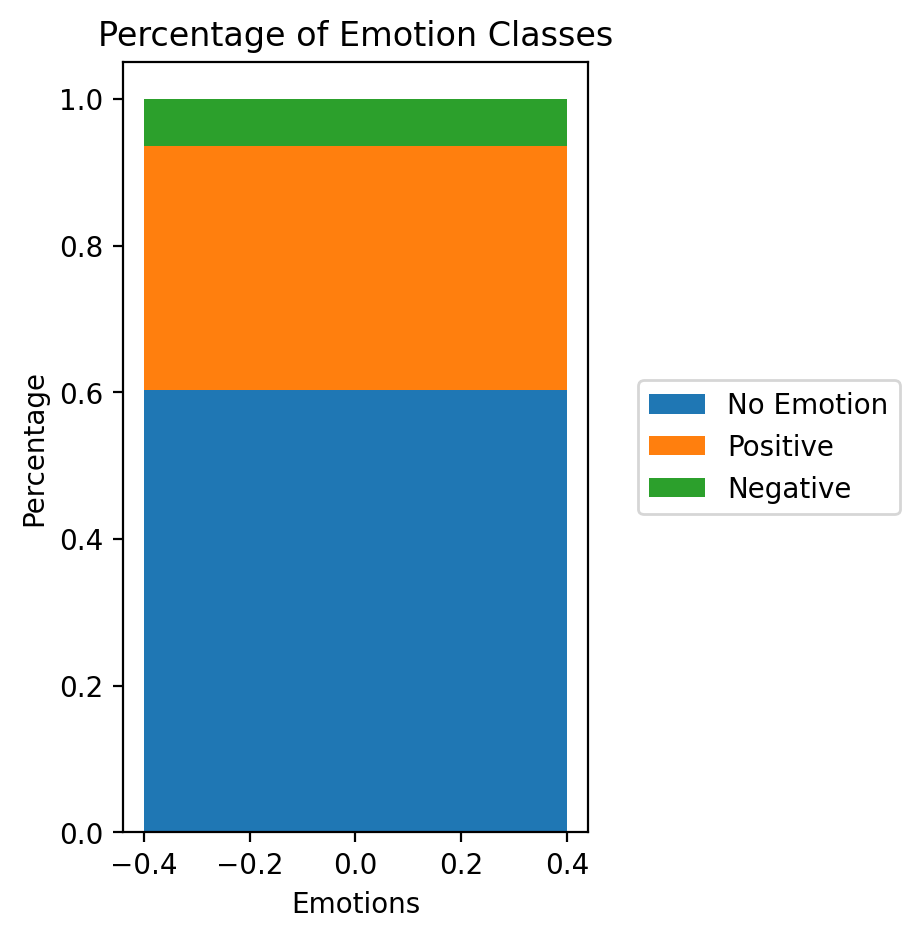

In [13]:
plt.figure(figsize=(3,5))
# Create the classes percentages
percentages = tweets_df['emotions'].value_counts(normalize = True)

# Create bar plot with stacked bars
plt.bar(0, percentages[0], label='No Emotion')
plt.bar(0, percentages[1], bottom=percentages[0], label='Positive')
plt.bar(0, percentages[2], bottom=sum(percentages[:2]), label='Negative')
plt.legend(bbox_to_anchor=(1.7, 0.5), loc="center right")

# Set axis labels and title
plt.xlabel('Emotions')
plt.ylabel('Percentage')
plt.title('Percentage of Emotion Classes')

# Display the plot
plt.show()

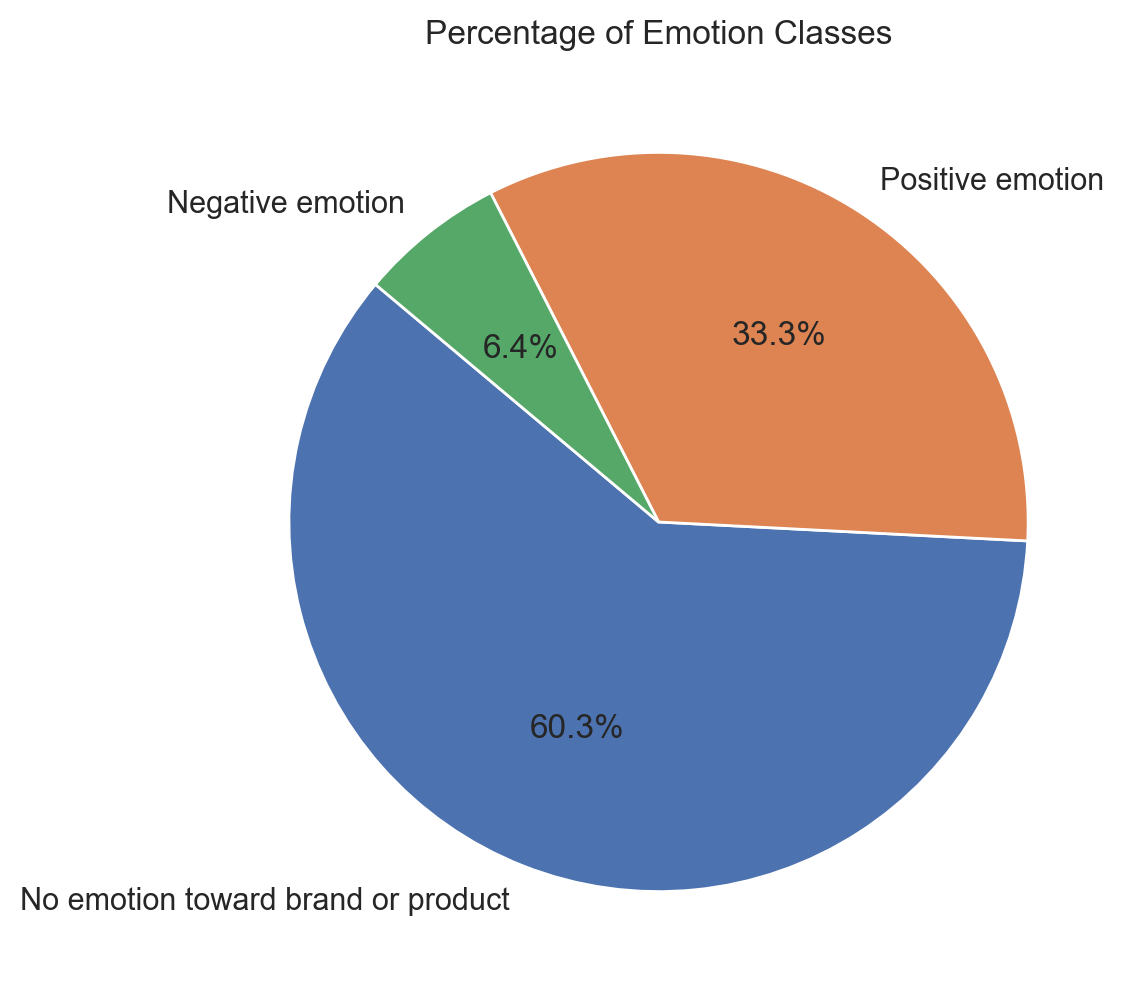

In [14]:
# Calculate the class percentages
percentages = tweets_df['emotions'].value_counts(normalize=True)

# Set the style to use Seaborn's color palette
sns.set(style="whitegrid")

# Create a pie chart (circle plot)
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("deep"))

# Set the title
plt.title('Percentage of Emotion Classes')

# Show the plot
plt.show()

In [15]:
tweets_df['brands'].value_counts()

brands
iPad                               942
Apple                              659
iPad or iPhone App                 470
Google                             429
iPhone                             296
Other Google product or service    292
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [16]:
grouped_by_emotions = tweets_df.groupby(['emotions'])['brands'].value_counts()
grouped_by_emotions

emotions                            brands                         
Negative emotion                    iPad                               125
                                    iPhone                             103
                                    Apple                               95
                                    Google                              68
                                    iPad or iPhone App                  63
                                    Other Google product or service     47
                                    Android                              8
                                    Android App                          8
                                    Other Apple product or service       2
No emotion toward brand or product  iPad                                24
                                    Apple                               21
                                    Google                              15
                                

<Axes: ylabel='brands'>

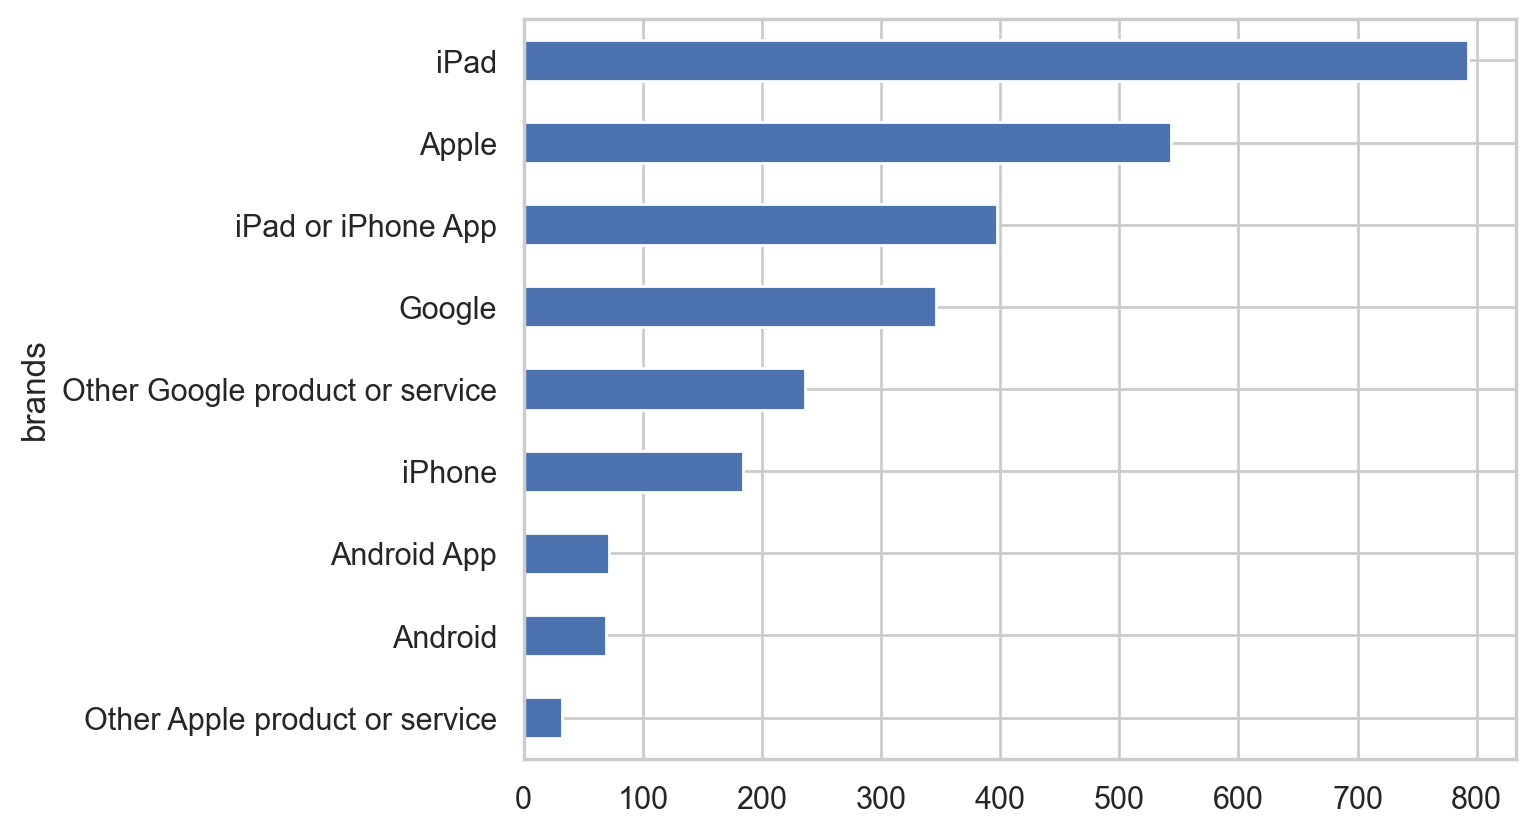

In [17]:
grouped_by_emotions['Positive emotion'].sort_values().plot(kind='barh', stacked=True)

<Axes: ylabel='brands'>

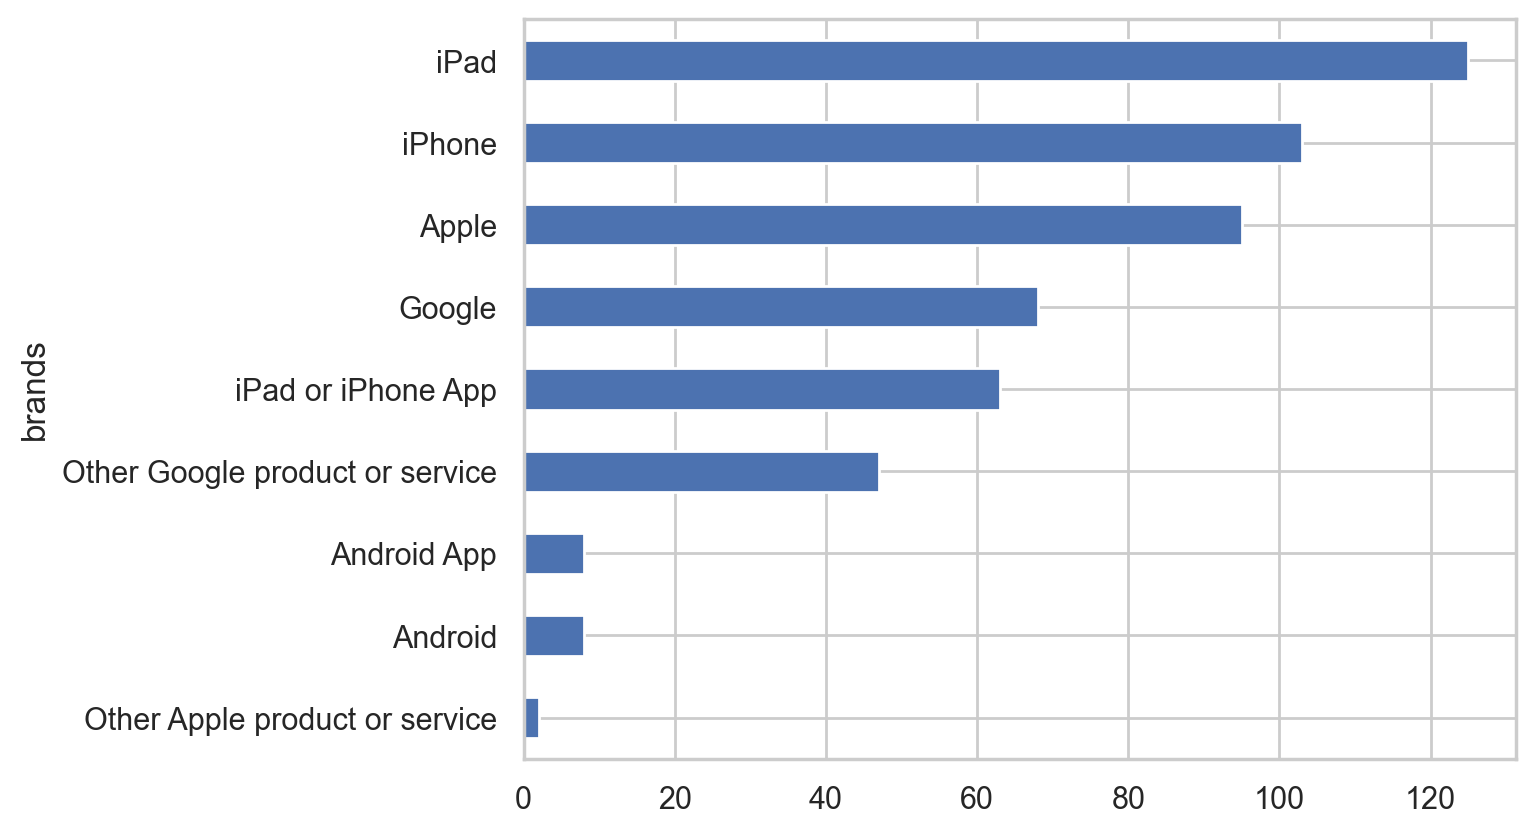

In [18]:
grouped_by_emotions['Negative emotion'].sort_values().plot(kind='barh', stacked=True)

In [19]:
# Calculate the percentage of each emotion within each category
grouped_by_emotions['percentage'] = (grouped_by_emotions['count'] / grouped_by_emotions.groupby('brands')['count'].transform('sum')) * 100

# Set the style to use Seaborn's color palette
sns.set(style="whitegrid")

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='brands', y='percentage', hue='emotions', data=grouped_by_emotions, palette='deep')

# Set axis labels and title
plt.xlabel('Brands')
plt.ylabel('Percentage')
plt.title('Percentage of Emotions by Category')

# Customize legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Emotions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

KeyError: 'count'

In [23]:
tweets_df

,tweets,brands,emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


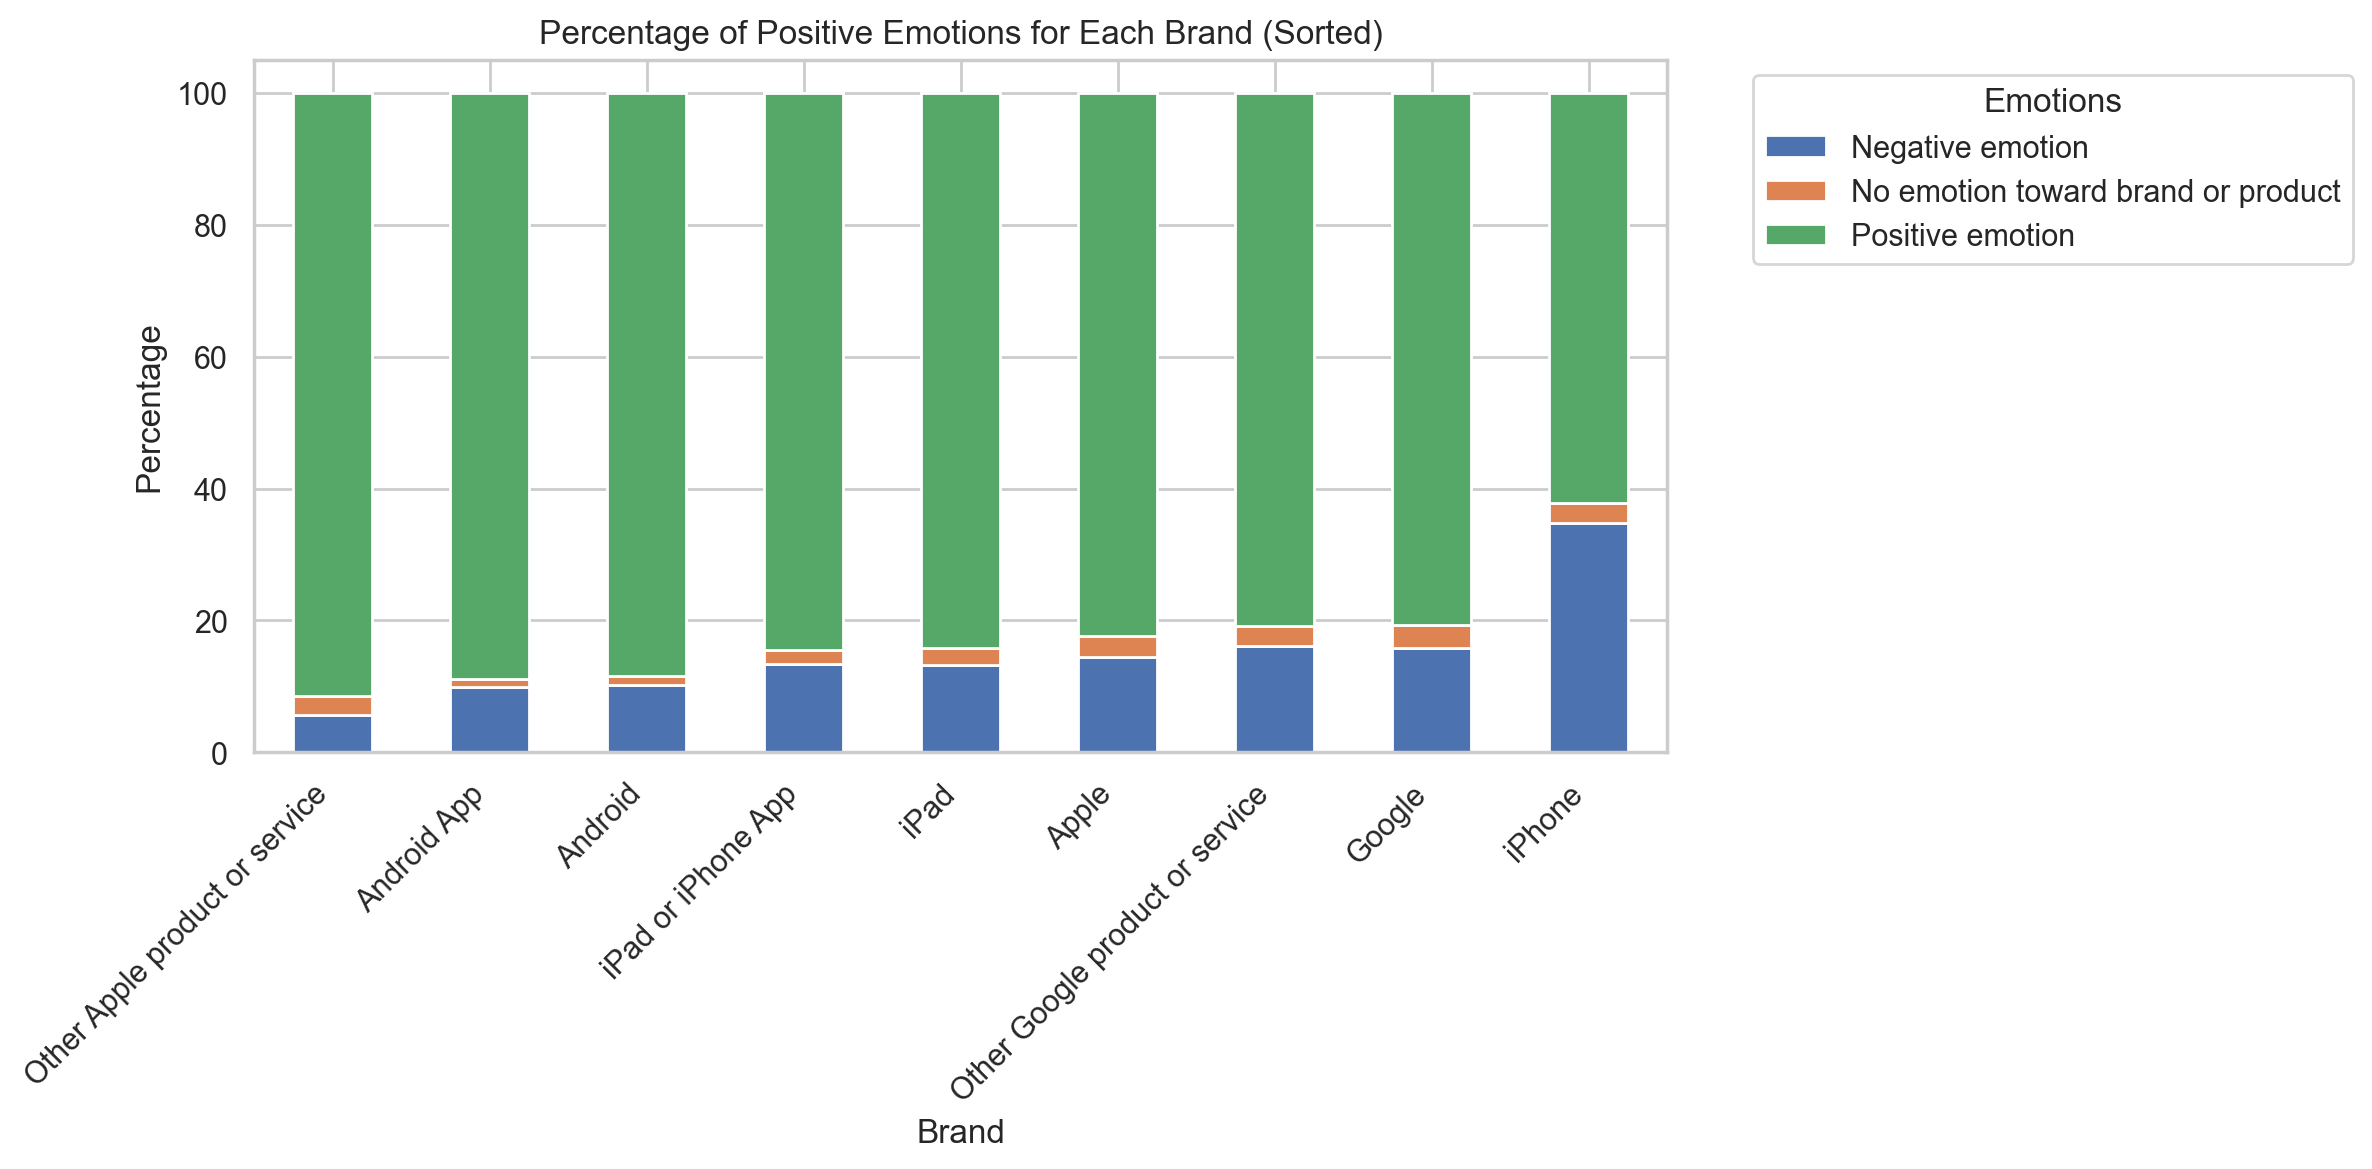

In [35]:
# Group the data by 'brands' and 'emotions' and calculate the count of each combination
grouped = tweets_df.groupby(['brands', 'emotions']).size().unstack()

# Calculate the total count of each brand
total_counts = grouped.sum(axis=1)

# Calculate the percentages
percentage_data = grouped.div(total_counts, axis=0) * 100

# Sort the DataFrame by the percentage of positive emotion in descending order
sorted_percentage_data = percentage_data.sort_values(by='Positive emotion', ascending=False)

# Create a stacked bar plot
ax = sorted_percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Brand')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Positive Emotions for Each Brand (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()